<a href="https://colab.research.google.com/github/akhilesh0090/Load_Prediction/blob/main/Load_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [97]:
df = pd.read_csv('load_data.csv')

In [98]:
df.sample(5)

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
22376,22-08-2018 02:15,2.63,4.28,0.00,0.000000,52.35,100.00,8100.0,Light_Load
9204,06-04-2018 21:15,28.33,0.00,9.22,0.015218,100.00,95.09,76500.0,Medium_Load
26178,30-09-2018 16:45,2.66,0.00,11.81,0.000000,100.00,21.97,60300.0,Light_Load
5497,27-02-2018 06:30,3.85,3.02,0.00,0.000000,78.68,100.00,23400.0,Light_Load
3587,07-02-2018 09:00,82.62,41.47,0.00,0.040000,89.37,100.00,NaN,Light_Load


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             33482 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  34165 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  33885 non-null  float64
 4   CO2(tCO2)                             34586 non-null  float64
 5   Lagging_Current_Power_Factor          34691 non-null  float64
 6   Leading_Current_Power_Factor          33570 non-null  float64
 7   NSM                                   34586 non-null  float64
 8   Load_Type                             35041 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.4+ MB


In [100]:
df.shape

(35041, 9)

## Converting Date_Time to datetime format

In [101]:

df['Date_Time'] = pd.to_datetime(df['Date_Time'],  format="%d-%m-%Y %H:%M")

## Finding Nulls

In [172]:
df.isnull().sum()

Date_Time                                  0
Usage_kWh                               1559
Lagging_Current_Reactive.Power_kVarh     876
Leading_Current_Reactive_Power_kVarh    1156
CO2(tCO2)                                455
Lagging_Current_Power_Factor             350
Leading_Current_Power_Factor            1471
NSM                                      455
Load_Type                                  0
dtype: int64

In [171]:
df.shape

(35041, 9)

In [173]:
df1 = df.copy()

In [174]:
df2 = df1.copy()

In [175]:
d=df.copy()

In [176]:
c=df.copy()


In [108]:
from sklearn.impute import SimpleImputer
import numpy as np

##Data Preprocessing
## Handle missing values

In [177]:
df1.isnull().sum()

Date_Time                                  0
Usage_kWh                               1559
Lagging_Current_Reactive.Power_kVarh     876
Leading_Current_Reactive_Power_kVarh    1156
CO2(tCO2)                                455
Lagging_Current_Power_Factor             350
Leading_Current_Power_Factor            1471
NSM                                      455
Load_Type                                  0
dtype: int64

In [178]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df1.iloc[:,1:8].values)
df1.iloc[:,1:8]=imputer.transform(df1.iloc[:,1:8].values)

In [179]:
df1.isnull().sum()

Date_Time                               0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
Load_Type                               0
dtype: int64

## checking for dublicates

In [180]:
df1.duplicated().sum()

0

## Checking skewness of frequency distribution

array([[<Axes: title={'center': 'Date_Time'}>,
        <Axes: title={'center': 'Usage_kWh'}>,
        <Axes: title={'center': 'Lagging_Current_Reactive.Power_kVarh'}>],
       [<Axes: title={'center': 'Leading_Current_Reactive_Power_kVarh'}>,
        <Axes: title={'center': 'CO2(tCO2)'}>,
        <Axes: title={'center': 'Lagging_Current_Power_Factor'}>],
       [<Axes: title={'center': 'Leading_Current_Power_Factor'}>,
        <Axes: title={'center': 'NSM'}>, <Axes: >]], dtype=object)

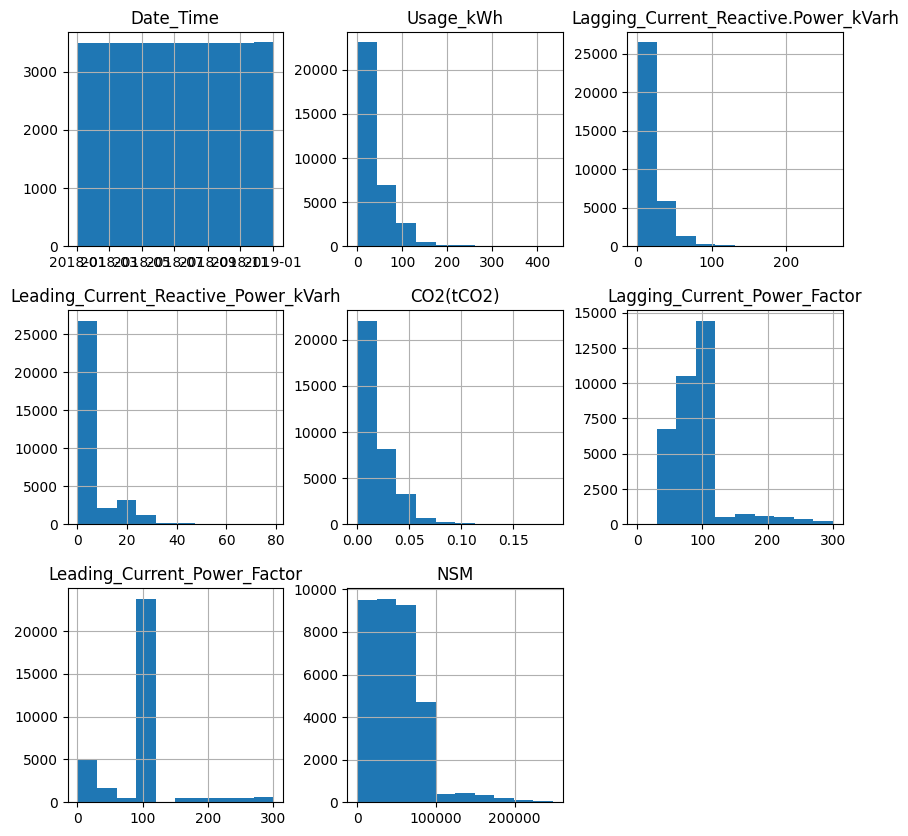

In [181]:
df.hist(figsize=(10,10))

<ipython-input-114-08c63f4c7da3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Usage_kWh'])


<Axes: xlabel='Usage_kWh', ylabel='Density'>

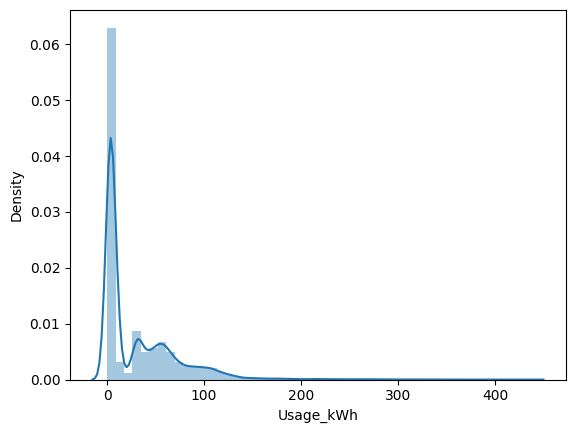

In [114]:
import seaborn as sns
sns.distplot(df1['Usage_kWh'])

<ipython-input-115-7931bbf162b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['NSM'])


<Axes: xlabel='NSM', ylabel='Density'>

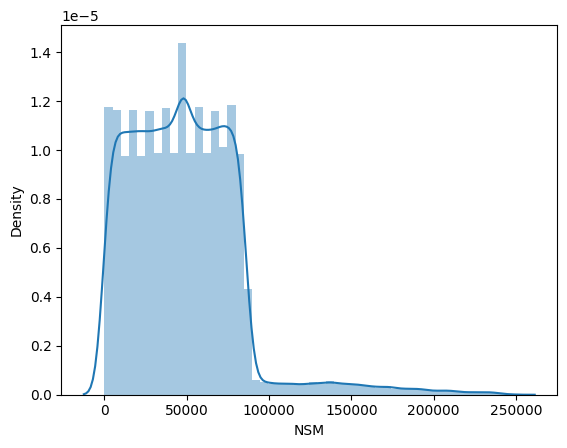

In [115]:
sns.distplot(df1['NSM'])

## Checking for Outliers using Boxplot

<Axes: ylabel='Usage_kWh'>

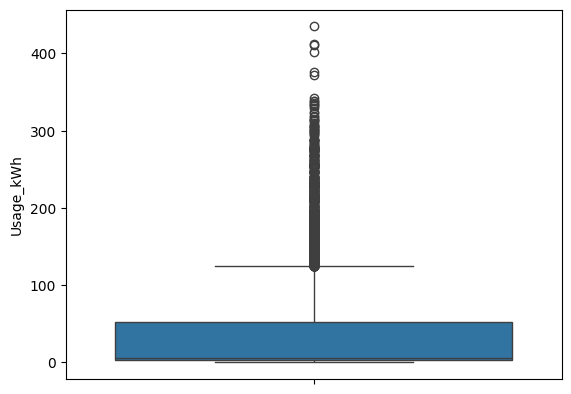

In [116]:
sns.boxplot(df1['Usage_kWh'])

<Axes: >

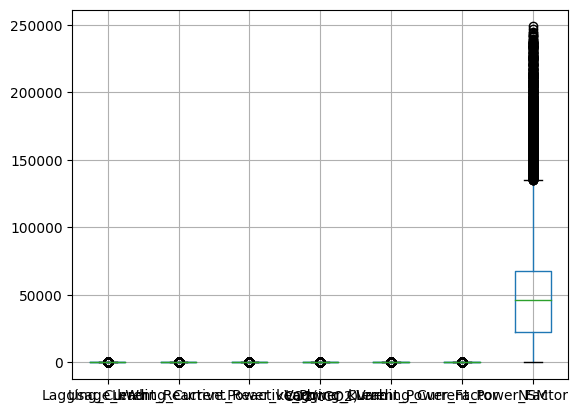

In [117]:
df1.boxplot()

##  Replacing outliers with median values using IQR

In [182]:
def outlier_replace(df, attribute):
    lq=df[attribute].quantile(0.25)
    uq=df[attribute].quantile(0.75)
    iqr=uq-lq
    lb=lq-1.5*iqr
    ub=uq+1.5*iqr
    df[df[attribute] > ub]=df[attribute].median()
    df [df[attribute] < lb]=df[attribute].median()
    return df

In [183]:
dff=df2.select_dtypes(exclude=['datetime64','object'])

In [184]:
for i in dff.columns:
    df0=outlier_replace(dff,i)

In [185]:
dff['Date_Time']=df2[['Date_Time']]

In [186]:
dff['Load_Type']=df2[['Load_Type']]

In [236]:
data_subset.isnull().sum()

Usage_kWh                               1061
Lagging_Current_Reactive.Power_kVarh     640
Leading_Current_Reactive_Power_kVarh     966
CO2(tCO2)                                316
NSM                                      329
Month                                      0
Day                                        0
Hour                                       0
Load_Type                                  0
dtype: int64

In [237]:
data_subset.dropna()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),NSM,Month,Day,Hour,Load_Type
0,8.753692,2.95,0.000000,0.0,900.000000,1,1,0,0
1,4.000000,4.46,0.000000,0.0,1800.000000,1,1,0,0
2,3.240000,3.28,0.000000,0.0,8070.880991,1,1,0,0
3,3.310000,3.56,0.000000,0.0,3600.000000,1,1,1,0
4,3.820000,4.50,0.000000,0.0,4500.000000,1,1,1,0
...,...,...,...,...,...,...,...,...,...
35036,3.740000,3.74,0.000000,0.0,83700.000000,12,31,23,0
35037,18900.000000,18900.00,18900.000000,18900.0,18900.000000,12,31,23,0
35038,3.780000,3.06,0.110000,0.0,85500.000000,12,31,23,0
35039,3.670000,3.02,0.174801,0.0,0.000000,12,31,0,0


In [319]:
ddff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Usage_kWh                             33980 non-null  float64       
 1   Lagging_Current_Reactive.Power_kVarh  34401 non-null  float64       
 2   Leading_Current_Reactive_Power_kVarh  34075 non-null  float64       
 3   CO2(tCO2)                             34725 non-null  float64       
 4   Lagging_Current_Power_Factor          34804 non-null  float64       
 5   Leading_Current_Power_Factor          34012 non-null  float64       
 6   NSM                                   34712 non-null  float64       
 7   Date_Time                             35041 non-null  datetime64[ns]
 8   Load_Type                             35041 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [189]:
ddff=dff.copy()

In [265]:
dff.shape

(35041, 13)

# Feature Engineering
# Extract date-related information from the "Date" column

In [309]:

dff['Month'] = dff['Date_Time'].dt.month
dff['Day'] = dff['Date_Time'].dt.day
dff['Hour'] = dff['Date_Time'].dt.hour
dff['Minute'] = dff['Date_Time'].dt.minute

selected_features = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                     'CO2(tCO2)', 'NSM', 'Month', 'Day', 'Hour','Date_Time', 'Load_Type']
data_subset = dff[selected_features]


# Subset the data with selected features

In [310]:
data_subset = dff[selected_features]

In [196]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dff.iloc[:,0:7].values)
dff.iloc[:,0:7]=imputer.transform(dff.iloc[:,0:7].values)

In [284]:
data_subset.isnull().sum()

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
NSM                                     0
Month                                   0
Day                                     0
Hour                                    0
Load_Type                               0
dtype: int64

In [256]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE


<ipython-input-256-b7b0b8ed15d0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Load_Type'] = label_encoder.fit_transform(data_subset['Load_Type'])


# Convert categorical variables like "Load_Type" into numerical using label encoding

In [ ]:
label_encoder = LabelEncoder()
data_subset['Load_Type'] = label_encoder.fit_transform(data_subset['Load_Type'])



In [283]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35041 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 3   CO2(tCO2)                             35041 non-null  float64
 4   NSM                                   35041 non-null  float64
 5   Month                                 35041 non-null  int32  
 6   Day                                   35041 non-null  int32  
 7   Hour                                  35041 non-null  int32  
 8   Load_Type                             35041 non-null  int64  
dtypes: float64(5), int32(3), int64(1)
memory usage: 2.0 MB


# Splitting data into features and target variable

In [ ]:

X = data_subset.drop('Load_Type', axis=1)
y = data_subset['Load_Type']


# Split the data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [266]:
X_train.isnull().sum()

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
NSM                                     0
Month                                   0
Day                                     0
Hour                                    0
dtype: int64

In [258]:
y_train.isnull().sum()

0

In [259]:
X_train.shape

(28032, 8)

In [260]:
y_train.shape

(28032,)

In [242]:
X_test = X_test.dropna()

In [248]:
X_train = X_train.dropna()

In [219]:
y_test = y_test.dropna()

In [220]:
y_train = y_train.dropna()

In [133]:
!pip install imbalanced-learn

In [199]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [211]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (28032, 8)
Shape of y_train: (28032,)


# Apply SMOTE sampling

In [268]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Print the shape of the resampled data

In [267]:
print("Resampled dataset shape:", X_train_resampled.shape, y_train_resampled.shape)

Resampled dataset shape: (43497, 8) (43497,)


# Feature scaling using standard scaler

In [262]:
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [269]:
print(X_test_scaled)

[[-0.15508459 -0.14942827 -0.14841606 ... -0.71780111  1.55970984
  -0.93006274]
 [-0.13453608 -0.13281273 -0.14841606 ...  1.07599373 -1.35619388
  -0.13428527]
 [-0.15739827 -0.15086427 -0.14841606 ... -1.61469853  1.2098014
  -0.29344077]
 ...
 [-0.15345825 -0.14989065 -0.14836346 ...  1.67392534 -1.70610233
  -0.77090724]
 [-0.14304215 -0.15054098 -0.1479689  ... -0.71780111 -0.18983239
  -0.45259626]
 [-0.15739827 -0.15086427 -0.14841606 ... -0.71780111 -1.00628543
   0.66149219]]


In [270]:
import pandas as pd

missing_values = pd.DataFrame(X_test_scaled).isnull().sum()
print(missing_values)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [208]:
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled = X_test_scaled.dropna()

In [209]:
missing_values = pd.DataFrame(X_test_scaled).isnull().sum()
print(missing_values)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


# Model Training (Decision Tree)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_resampled_scaled, y_train_resampled)

# Model Testing

In [270]:
y_pred_test = model.predict(X_test_scaled)

# Model Evaluation

In [271]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("Testing Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

Testing Metrics:
Accuracy: 0.9387929804537024
Precision: 0.9386885062525137
Recall: 0.9387929804537024
F1 Score: 0.9387278856830297


# Model Training (Logistic Regression)

In [275]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_resampled_scaled, y_train_resampled)

y_pred_test = model.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("Testing Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

Testing Metrics:
Accuracy: 0.670138393494079
Precision: 0.6847858817382275
Recall: 0.670138393494079
F1 Score: 0.6751600326714113


# Model Training (Random Forest)

In [277]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_resampled_scaled, y_train_resampled)

y_pred_test = model.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("Testing Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

Testing Metrics:
Accuracy: 0.9462120131259809
Precision: 0.946590612893808
Recall: 0.9462120131259809
F1 Score: 0.946367087966271


# Model Training (Gradient Boosting Classifier)

In [279]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train_resampled_scaled, y_train_resampled)

y_pred_test = model.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("Testing Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")


Testing Metrics:
Accuracy: 0.8994150378085319
Precision: 0.907361519016457
Recall: 0.8994150378085319
F1 Score: 0.9005597650423219
